# Task 1: Prediction using Supervised ML
- [Importing libraries](#import)
- [Reading Data](#read)
- [Exploratory Data Analysis](#ED)
- [Preparing the data](#PD)
- [Training the Algorithm](#TA)
- [Making Predictions](#MP)
- [Evaluating the model](#EM)

<a id='import'></a>
### Importing all libraries required:-

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

<a id='read'></a>
### Reading data:-

In [2]:
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<a id='ED'></a>
### Exploratory Data Analysis:-

In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [11]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [13]:
data.shape

(25, 2)

In [14]:
data.size

50

In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


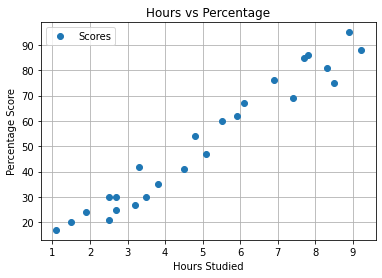

In [25]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

We can see that there is a positive linear relation between the number of hours studied and percentage of score.

<a id='PD'></a>
### Preparing the data:-

In [27]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

<a id='TA'></a>
### Training the Algorithm:-

In [52]:
model = LinearRegression()  
model.fit(X_train, y_train) 

LinearRegression()

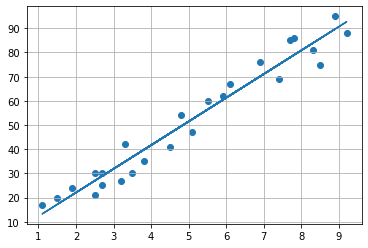

In [53]:
line = model.coef_*X+model.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.grid()
plt.show()

<a id='MP'></a>
### Making Predictions:-

In [54]:
y_pred = model.predict(X_test) 
y_pred

array([75.0306038 , 70.12457032, 46.57560965, 36.7635427 , 62.27491676,
       52.46284982, 34.80112931, 26.95147575])

In [55]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data 

,Actual,Predicted
0,69,75.030604
1,76,70.124570
2,41,46.575610
3,30,36.763543
4,67,62.274917
5,47,52.462850
6,42,34.801129
7,30,26.951476


In [57]:
hours = 9.25
n_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(n_pred[0]))

No of Hours = 9.25
Predicted Score = 93.18292765229911


<a id='EM'></a>
### Evaluating the model:-

In [51]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 5.585064226581482
